In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargar archivo CSV
df = pd.read_csv('Madrid_Listings.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20751 entries, 0 to 20750
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0.2                    20751 non-null  int64  
 1   Unnamed: 0.1                    20751 non-null  int64  
 2   Unnamed: 0                      20751 non-null  int64  
 3   id                              20751 non-null  float64
 4   nombre                          20751 non-null  object 
 5   descripcion                     20751 non-null  object 
 6   id_anfitrion                    20751 non-null  int64  
 7   nombre_anfitrion                20751 non-null  object 
 8   anfitrion_desde                 20751 non-null  object 
 9   ubicacion_anfitrion             20751 non-null  object 
 10  tiempo_respuesta_anfitrion      20751 non-null  object 
 11  tasa_respuesta_anfitrion        20751 non-null  float64
 12  tasa_aceptacion_anfitrion       

In [3]:
# Convertir texto a numérico (1 = Sí, 0 = No)
df['es_superanfitrion'] = df['es_superanfitrion'].map({'Si': 1, 'Sí': 1, 'No': 0})


Analizar la correlación que existe en cada tipo de habitación (Elegir 4 tipos) respecto a las variables siguientes en el siguiente orden “(dependiente, independiente)”


In [4]:
pd.unique(df['tipo_habitacion'])

#Segmentación por tipo de habitación

entire_home_apt_df = df[df['tipo_habitacion'] == 'Entire home/apt'].copy()
private_room_df = df[df['tipo_habitacion'] == 'Private room'].copy()
hotel_room_df = df[df['tipo_habitacion'] == 'Hotel room'].copy()
shared_room_df = df[df['tipo_habitacion'] == 'Shared room'].copy()

print(f"- entire_home_apt_df (Shape: {entire_home_apt_df.shape})")
print(f"- private_room_df (Shape: {private_room_df.shape})")
print(f"- hotel_room_df (Shape: {hotel_room_df.shape})")
print(f"- shared_room_df (Shape: {shared_room_df.shape})")

- entire_home_apt_df (Shape: (14172, 59))
- private_room_df (Shape: (6377, 59))
- hotel_room_df (Shape: (68, 59))
- shared_room_df (Shape: (134, 59))


In [5]:
# Calcular correlaciones para "Entire home/apt"
Corr1 = entire_home_apt_df['tasa_respuesta_anfitrion'].corr(entire_home_apt_df['tasa_aceptacion_anfitrion'])
Corr2 = entire_home_apt_df['tasa_aceptacion_anfitrion'].corr(entire_home_apt_df['precio'])
Corr3 = entire_home_apt_df['tasa_aceptacion_anfitrion'].corr(entire_home_apt_df['num_resenas'])
Corr4 = entire_home_apt_df['review_scores_rating'].corr(entire_home_apt_df['total_anuncios_anfitrion'])
Corr5 = entire_home_apt_df['disponibilidad_365d'].corr(entire_home_apt_df['num_resenas'])
Corr6 = entire_home_apt_df['num_resenas_30d'].corr(entire_home_apt_df['review_scores_communication'])

print("tasa_respuesta_anfitrion vs tasa_aceptacion_anfitrion correlación:", Corr1)
print("tasa_aceptacion_anfitrion vs precio correlación:", Corr2)
print("tasa_aceptacion_anfitrion vs num_resenas correlación:", Corr3)
print("review_scores_rating vs total_anuncios_anfitrion correlación :", Corr4)
print("disponibilidad_365d vs num_resenas correlación :", Corr5)
print("num_resenas_30d vs review_scores_communication correlación :", Corr6)

tasa_respuesta_anfitrion vs tasa_aceptacion_anfitrion correlación: 0.6821628854057998
tasa_aceptacion_anfitrion vs precio correlación: 0.0853768632322042
tasa_aceptacion_anfitrion vs num_resenas correlación: 0.17004769039936274
review_scores_rating vs total_anuncios_anfitrion correlación : 0.0008443371715848026
disponibilidad_365d vs num_resenas correlación : -0.05505295242984395
num_resenas_30d vs review_scores_communication correlación : -0.009915940835905341


In [6]:
# Crear una tabla con los resultados de las correlaciones
ResultadosCorrEH = pd.DataFrame({
    'Variables Entire Home/APT': [
        'tasa_respuesta_anfitrion vs tasa_aceptacion_anfitrion',
        'tasa_aceptacion_anfitrion vs precio',
        'tasa_aceptacion_anfitrion vs num_resenas',
        'review_scores_rating vs total_anuncios_anfitrion',
        'disponibilidad_365d vs num_resenas',
        'num_resenas_30d vs review_scores_communication'
    ],
    'Correlación': [Corr1, Corr2, Corr3, Corr4, Corr5, Corr6]
})

print(ResultadosCorrEH)

                           Variables Entire Home/APT  Correlación
0  tasa_respuesta_anfitrion vs tasa_aceptacion_an...     0.682163
1                tasa_aceptacion_anfitrion vs precio     0.085377
2           tasa_aceptacion_anfitrion vs num_resenas     0.170048
3   review_scores_rating vs total_anuncios_anfitrion     0.000844
4                 disponibilidad_365d vs num_resenas    -0.055053
5     num_resenas_30d vs review_scores_communication    -0.009916


In [7]:
# Calcular correlaciones para "Private room"
corr7 = private_room_df['tasa_respuesta_anfitrion'].corr(private_room_df['tasa_aceptacion_anfitrion'])
corr8 = private_room_df['tasa_aceptacion_anfitrion'].corr(private_room_df['precio'])
corr9 = private_room_df['tasa_aceptacion_anfitrion'].corr(private_room_df['num_resenas'])
corr10 = private_room_df['review_scores_rating'].corr(private_room_df['total_anuncios_anfitrion'])
corr11 = private_room_df['disponibilidad_365d'].corr(private_room_df['num_resenas'])
corr12 = private_room_df['num_resenas_30d'].corr(private_room_df['review_scores_communication'])


print("tasa_respuesta_anfitrion vs tasa_aceptacion_anfitrion correlación :", corr7)
print("tasa_aceptacion_anfitrion vs precio correlación :", corr8)
print("tasa_aceptacion_anfitrion vs num_resenas correlación :", corr9)
print("review_scores_rating vs total_anuncios_anfitrion correlación :", corr10)
print("disponibilidad_365d vs num_resenas correlación :", corr11)
print("num_resenas_30d vs review_scores_communication correlación :", corr12)

tasa_respuesta_anfitrion vs tasa_aceptacion_anfitrion correlación : 0.5253879798166373
tasa_aceptacion_anfitrion vs precio correlación : 0.07482383833148333
tasa_aceptacion_anfitrion vs num_resenas correlación : 0.21325325046868618
review_scores_rating vs total_anuncios_anfitrion correlación : -0.025770595078991994
disponibilidad_365d vs num_resenas correlación : 0.01426540761958703
num_resenas_30d vs review_scores_communication correlación : -0.0206958416383416


In [8]:
# Crear una tabla con los resultados de las correlaciones
ResultadosCorrPrv = pd.DataFrame({
    'Variables Private Room': [
        'tasa_respuesta_anfitrion vs tasa_aceptacion_anfitrion',
        'tasa_aceptacion_anfitrion vs precio',
        'tasa_aceptacion_anfitrion vs num_resenas',
        'review_scores_rating vs total_anuncios_anfitrion',
        'disponibilidad_365d vs num_resenas',
        'num_resenas_30d vs review_scores_communication'
    ],
    'Correlación': [corr7, corr8, corr9, corr10, corr11, corr12]
})

print(ResultadosCorrPrv)

                              Variables Private Room  Correlación
0  tasa_respuesta_anfitrion vs tasa_aceptacion_an...     0.525388
1                tasa_aceptacion_anfitrion vs precio     0.074824
2           tasa_aceptacion_anfitrion vs num_resenas     0.213253
3   review_scores_rating vs total_anuncios_anfitrion    -0.025771
4                 disponibilidad_365d vs num_resenas     0.014265
5     num_resenas_30d vs review_scores_communication    -0.020696


In [9]:
# Calcular correlaciones para "Hotel room"
corr13 = hotel_room_df['tasa_respuesta_anfitrion'].corr(hotel_room_df['tasa_aceptacion_anfitrion'])
corr14 = hotel_room_df['tasa_aceptacion_anfitrion'].corr(hotel_room_df['precio'])
corr15 = hotel_room_df['tasa_aceptacion_anfitrion'].corr(hotel_room_df['num_resenas'])
corr16 = hotel_room_df['review_scores_rating'].corr(hotel_room_df['total_anuncios_anfitrion'])
corr17 = hotel_room_df['disponibilidad_365d'].corr(hotel_room_df['num_resenas'])
corr18 = hotel_room_df['num_resenas_30d'].corr(hotel_room_df['review_scores_communication'])


print("tasa_respuesta_anfitrion vs tasa_aceptacion_anfitrion correlación :", corr13)
print("tasa_aceptacion_anfitrion vs precio correlación :", corr14)
print("tasa_aceptacion_anfitrion vs num_resenas correlación :", corr15)
print("review_scores_rating vs total_anuncios_anfitrion correlación :", corr16)
print("disponibilidad_365d vs num_resenas correlación :", corr17)
print("num_resenas_30d vs review_scores_communication correlación :", corr18)

tasa_respuesta_anfitrion vs tasa_aceptacion_anfitrion correlación : 0.36744816726170837
tasa_aceptacion_anfitrion vs precio correlación : 0.20453421162515922
tasa_aceptacion_anfitrion vs num_resenas correlación : 0.11766214032817231
review_scores_rating vs total_anuncios_anfitrion correlación : -0.20943918528583383
disponibilidad_365d vs num_resenas correlación : 0.36462866226882973
num_resenas_30d vs review_scores_communication correlación : 0.11683108714790537


In [10]:
# Crear una tabla con los resultados de las correlaciones
ResultadosCorrHR = pd.DataFrame({
    'Variables Hotel Room': [
        'tasa_respuesta_anfitrion vs tasa_aceptacion_anfitrion',
        'tasa_aceptacion_anfitrion vs precio',
        'tasa_aceptacion_anfitrion vs num_resenas',
        'review_scores_rating vs total_anuncios_anfitrion',
        'disponibilidad_365d vs num_resenas',
        'num_resenas_30d vs review_scores_communication'
    ],
    'Correlación': [corr13, corr14, corr15, corr16, corr17, corr18]
})

print(ResultadosCorrHR)

                                Variables Hotel Room  Correlación
0  tasa_respuesta_anfitrion vs tasa_aceptacion_an...     0.367448
1                tasa_aceptacion_anfitrion vs precio     0.204534
2           tasa_aceptacion_anfitrion vs num_resenas     0.117662
3   review_scores_rating vs total_anuncios_anfitrion    -0.209439
4                 disponibilidad_365d vs num_resenas     0.364629
5     num_resenas_30d vs review_scores_communication     0.116831


In [11]:
# Calcular correlaciones para "Shared room"
corr19 = shared_room_df['tasa_respuesta_anfitrion'].corr(shared_room_df['tasa_aceptacion_anfitrion'])
corr20 = shared_room_df['tasa_aceptacion_anfitrion'].corr(shared_room_df['precio'])
corr21 = shared_room_df['tasa_aceptacion_anfitrion'].corr(shared_room_df['num_resenas'])
corr22 = shared_room_df['review_scores_rating'].corr(shared_room_df['total_anuncios_anfitrion'])
corr23 = shared_room_df['disponibilidad_365d'].corr(shared_room_df['num_resenas'])
corr24 = shared_room_df['num_resenas_30d'].corr(shared_room_df['review_scores_communication'])


print("tasa_respuesta_anfitrion vs tasa_aceptacion_anfitrion correlación :", corr19)
print("tasa_aceptacion_anfitrion vs precio correlación :", corr20)
print("tasa_aceptacion_anfitrion vs num_resenas correlación :", corr21)
print("review_scores_rating vs total_anuncios_anfitrion correlación :", corr22)
print("disponibilidad_365d vs num_resenas correlación :", corr23)
print("num_resenas_30d vs review_scores_communication correlación :", corr24)

tasa_respuesta_anfitrion vs tasa_aceptacion_anfitrion correlación : 0.06330073172261558
tasa_aceptacion_anfitrion vs precio correlación : -0.10268156157772965
tasa_aceptacion_anfitrion vs num_resenas correlación : 0.02192469335181962
review_scores_rating vs total_anuncios_anfitrion correlación : 0.067641243412254
disponibilidad_365d vs num_resenas correlación : -0.13062137392165543
num_resenas_30d vs review_scores_communication correlación : -0.0036612860225549906


In [12]:
# Crear una tabla con los resultados de las correlaciones
ResultadosCorrSR = pd.DataFrame({
    'Variables Shared Room': [
        'tasa_respuesta_anfitrion vs tasa_aceptacion_anfitrion',
        'tasa_aceptacion_anfitrion vs precio',
        'tasa_aceptacion_anfitrion vs num_resenas',
        'review_scores_rating vs total_anuncios_anfitrion',
        'disponibilidad_365d vs num_resenas',
        'num_resenas_30d vs review_scores_communication'
    ],
    'Correlación': [corr19, corr20, corr21, corr22, corr23, corr24]
})

print(ResultadosCorrSR)

                               Variables Shared Room  Correlación
0  tasa_respuesta_anfitrion vs tasa_aceptacion_an...     0.063301
1                tasa_aceptacion_anfitrion vs precio    -0.102682
2           tasa_aceptacion_anfitrion vs num_resenas     0.021925
3   review_scores_rating vs total_anuncios_anfitrion     0.067641
4                 disponibilidad_365d vs num_resenas    -0.130621
5     num_resenas_30d vs review_scores_communication    -0.003661


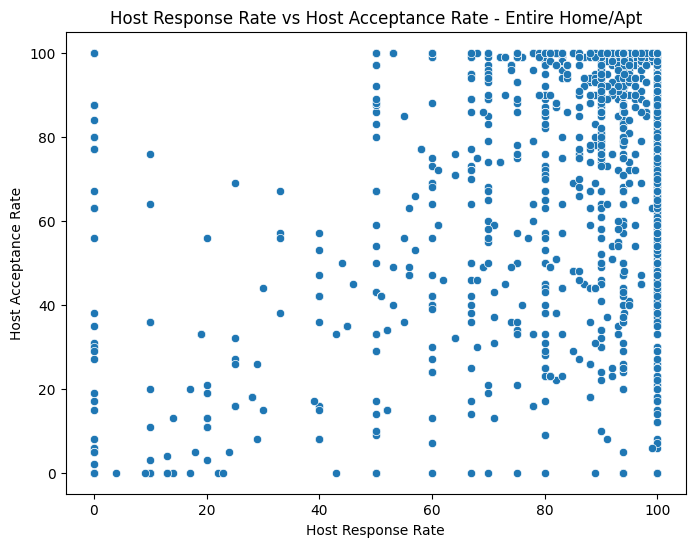

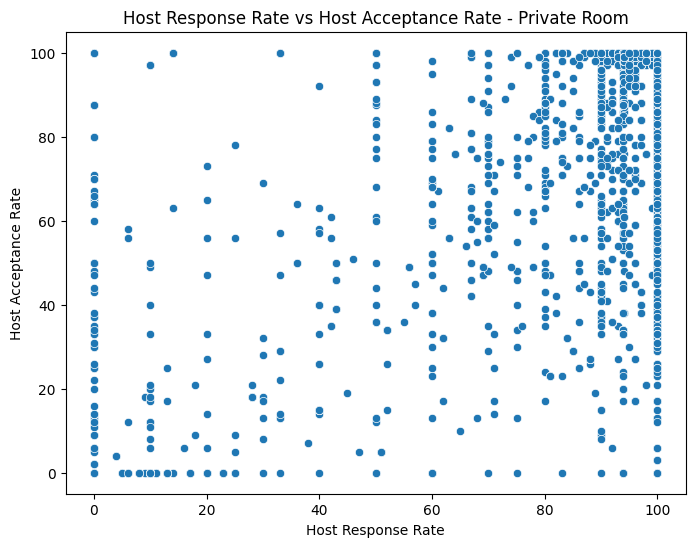

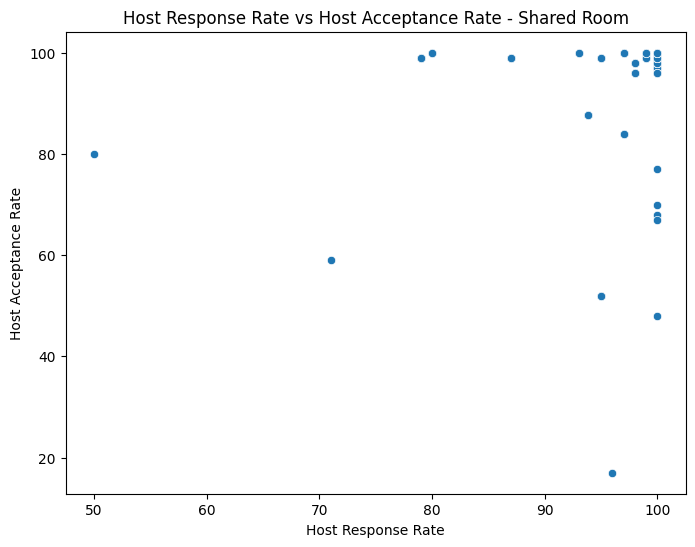

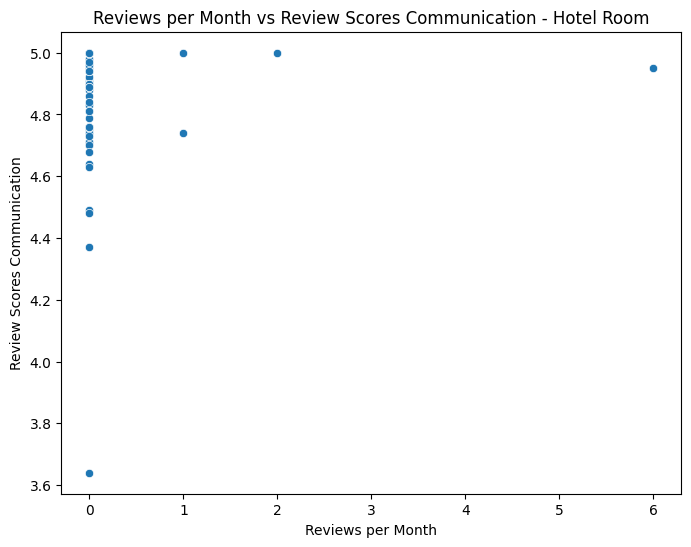

In [13]:
#  Host response rate vs host acceptance rate - Entire home/apt
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tasa_respuesta_anfitrion', y='tasa_aceptacion_anfitrion', data=entire_home_apt_df)
plt.title('Host Response Rate vs Host Acceptance Rate - Entire Home/Apt')
plt.xlabel('Host Response Rate')
plt.ylabel('Host Acceptance Rate')
plt.show()

#  Host response rate vs host acceptance rate - Private room
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tasa_respuesta_anfitrion', y='tasa_aceptacion_anfitrion', data=private_room_df)
plt.title('Host Response Rate vs Host Acceptance Rate - Private Room')
plt.xlabel('Host Response Rate')
plt.ylabel('Host Acceptance Rate')
plt.show()

#  Host response rate vs host acceptance rate - Shared room
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tasa_respuesta_anfitrion', y='tasa_aceptacion_anfitrion', data=shared_room_df)
plt.title('Host Response Rate vs Host Acceptance Rate - Shared Room')
plt.xlabel('Host Response Rate')
plt.ylabel('Host Acceptance Rate')
plt.show()

#  Reviews per month vs review scores communication - Hotel room
plt.figure(figsize=(8, 6))
sns.scatterplot(x='num_resenas_30d', y='review_scores_communication', data=hotel_room_df)
plt.title('Reviews per Month vs Review Scores Communication - Hotel Room')
plt.xlabel('Reviews per Month')
plt.ylabel('Review Scores Communication')
plt.show()





In [14]:
display(df.dtypes)
df.head()


Unnamed: 0.2                        int64
Unnamed: 0.1                        int64
Unnamed: 0                          int64
id                                float64
nombre                             object
descripcion                        object
id_anfitrion                        int64
nombre_anfitrion                   object
anfitrion_desde                    object
ubicacion_anfitrion                object
tiempo_respuesta_anfitrion         object
tasa_respuesta_anfitrion          float64
tasa_aceptacion_anfitrion         float64
es_superanfitrion                 float64
verificaciones_anfitrion           object
anfitrion_tiene_foto               object
identidad_anfitrion_verificada     object
barrio                             object
distrito                           object
latitud                           float64
longitud                          float64
tipo_propiedad                     object
tipo_habitacion                    object
amenidades                        

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,nombre,descripcion,id_anfitrion,nombre_anfitrion,anfitrion_desde,ubicacion_anfitrion,...,num_resenas_30d,num_resenas_1y,ingresos_estimados_365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,0,0,0,21853.0,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,Abdel,21/02/2010,"Madrid, Spain",...,0.0,0.0,0.0,4.58,4.72,4.56,4.75,4.82,4.21,4.67
1,1,1,1,30320.0,Apartamentos Dana Sol,Sin descripciÃ³n,130907,Dana,24/05/2010,"Madrid, Spain",...,0.0,0.0,17595.0,4.63,4.71,4.88,4.82,4.78,4.90,4.69
2,2,2,2,30959.0,Beautiful loft in Madrid Center,Beautiful Loft 60m2 size just in the historica...,132883,Angela,26/05/2010,"Madrid, Spain",...,0.0,0.0,17595.0,4.38,4.14,4.38,4.63,4.63,4.88,4.25
3,3,3,3,40916.0,Apartasol Apartamentos Dana,Sin descripciÃ³n,130907,Dana,24/05/2010,"Madrid, Spain",...,0.0,0.0,17595.0,4.65,4.69,4.90,4.85,4.79,4.88,4.55
4,4,4,4,62423.0,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,INCREDIBLE HOME OF AN ARTIST SURROUNDED BY PAI...,303845,Arturo,29/11/2010,"Madrid, Spain",...,2.0,45.0,13056.0,4.65,4.78,4.44,4.80,4.86,4.97,4.59


In [15]:
# 1️⃣ Eliminar columnas que comienzan con 'Unnamed'
df = df.loc[:, ~df.columns.str.startswith('Unnamed')].copy()
df.head()


,id,nombre,descripcion,id_anfitrion,nombre_anfitrion,anfitrion_desde,ubicacion_anfitrion,tiempo_respuesta_anfitrion,tasa_respuesta_anfitrion,tasa_aceptacion_anfitrion,...,num_resenas_30d,num_resenas_1y,ingresos_estimados_365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,21853.0,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,Abdel,21/02/2010,"Madrid, Spain",Desconocida,93.876938,87.653642,...,0.0,0.0,0.0,4.58,4.72,4.56,4.75,4.82,4.21,4.67
1,30320.0,Apartamentos Dana Sol,Sin descripciÃ³n,130907,Dana,24/05/2010,"Madrid, Spain",Desconocida,93.876938,87.653642,...,0.0,0.0,17595.0,4.63,4.71,4.88,4.82,4.78,4.90,4.69
2,30959.0,Beautiful loft in Madrid Center,Beautiful Loft 60m2 size just in the historica...,132883,Angela,26/05/2010,"Madrid, Spain",Desconocida,93.876938,87.653642,...,0.0,0.0,17595.0,4.38,4.14,4.38,4.63,4.63,4.88,4.25
3,40916.0,Apartasol Apartamentos Dana,Sin descripciÃ³n,130907,Dana,24/05/2010,"Madrid, Spain",Desconocida,93.876938,87.653642,...,0.0,0.0,17595.0,4.65,4.69,4.90,4.85,4.79,4.88,4.55
4,62423.0,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,INCREDIBLE HOME OF AN ARTIST SURROUNDED BY PAI...,303845,Arturo,29/11/2010,"Madrid, Spain",within an hour,100.000000,100.000000,...,2.0,45.0,13056.0,4.65,4.78,4.44,4.80,4.86,4.97,4.59


In [16]:

# 2) Selección de variables cuantitativas existentes en el df
cuantitativas = df[[
    'tasa_respuesta_anfitrion',
    'tasa_aceptacion_anfitrion',
    'total_anuncios_anfitrion',
    'capacidad',
    'banos',
    'habitaciones',
    'camas',
    'precio',
    'noches_minimas',
    'noches_maximas',
    'promedio_min_noches',
    'promedio_max_noches',
    'disponibilidad_30d',
    'disponibilidad_60d',
    'disponibilidad_90d',
    'disponibilidad_365d',
    'num_resenas',
    'num_resenas_12m',
    'num_resenas_30d',
    'num_resenas_1y',
    'ocupacion_estimada_365d',
    'ingresos_estimados_365d',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'es_superanfitrion',
    'anuncios_activos_anfitrion'
]]


In [17]:
display(cuantitativas.dtypes)

tasa_respuesta_anfitrion       float64
tasa_aceptacion_anfitrion      float64
total_anuncios_anfitrion       float64
capacidad                      float64
banos                          float64
habitaciones                   float64
camas                          float64
precio                         float64
noches_minimas                 float64
noches_maximas                 float64
promedio_min_noches            float64
promedio_max_noches            float64
disponibilidad_30d               int64
disponibilidad_60d               int64
disponibilidad_90d               int64
disponibilidad_365d              int64
num_resenas                    float64
num_resenas_12m                float64
num_resenas_30d                float64
num_resenas_1y                 float64
ocupacion_estimada_365d          int64
ingresos_estimados_365d        float64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin    

In [18]:
!pip install jinja2

In [19]:
CorrFactors=cuantitativas.corr()
CorrFactors2= abs(CorrFactors)
CorrFactors2.style.background_gradient(cmap='coolwarm')


,tasa_respuesta_anfitrion,tasa_aceptacion_anfitrion,total_anuncios_anfitrion,capacidad,banos,habitaciones,camas,precio,noches_minimas,noches_maximas,promedio_min_noches,promedio_max_noches,disponibilidad_30d,disponibilidad_60d,disponibilidad_90d,disponibilidad_365d,num_resenas,num_resenas_12m,num_resenas_30d,num_resenas_1y,ocupacion_estimada_365d,ingresos_estimados_365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,es_superanfitrion,anuncios_activos_anfitrion
tasa_respuesta_anfitrion,1.000000,0.616680,0.037239,0.080502,0.046726,0.034330,0.060186,0.073758,0.001332,0.049829,0.012412,0.106454,0.086765,0.060458,0.056929,0.036291,0.131570,0.167827,0.171631,0.138936,0.191985,0.174268,0.004339,0.002963,0.011666,0.004212,0.003725,0.001159,0.008793,0.177871,0.043080
tasa_aceptacion_anfitrion,0.616680,1.000000,0.000772,0.171669,0.038479,0.026201,0.105638,0.146081,0.119709,0.085095,0.066339,0.193853,0.095992,0.066396,0.061410,0.013363,0.194831,0.263945,0.225306,0.226869,0.262959,0.254857,0.005338,0.004614,0.012301,0.010870,0.004154,0.008764,0.003521,0.138283,0.012837
total_anuncios_anfitrion,0.037239,0.000772,1.000000,0.169831,0.092835,0.064916,0.102810,0.109393,0.102063,0.227844,0.212757,0.129197,0.042344,0.014339,0.030395,0.155723,0.089928,0.076928,0.083016,0.075033,0.072734,0.010489,0.003520,0.002265,0.003643,0.004444,0.004355,0.002250,0.008126,0.206430,0.978492
capacidad,0.080502,0.171669,0.169831,1.000000,0.372187,0.617051,0.743645,0.476978,0.058485,0.118016,0.007333,0.121838,0.091002,0.053748,0.029935,0.045619,0.107902,0.128495,0.061304,0.124122,0.099060,0.380942,0.000674,0.006681,0.004626,0.006661,0.007209,0.002915,0.006972,0.000867,0.164335
banos,0.046726,0.038479,0.092835,0.372187,1.000000,0.486142,0.407814,0.319574,0.063984,0.056772,0.090577,0.057673,0.094508,0.077091,0.074393,0.011243,0.019426,0.007022,0.016613,0.018270,0.023066,0.201325,0.003139,0.005374,0.000330,0.006634,0.004787,0.010381,0.002041,0.011031,0.098962
habitaciones,0.034330,0.026201,0.064916,0.617051,0.486142,1.000000,0.629055,0.422411,0.063185,0.046658,0.102158,0.056268,0.125153,0.102439,0.092938,0.021912,0.023944,0.004159,0.033818,0.020174,0.013151,0.274209,0.006832,0.012968,0.015241,0.008750,0.003464,0.007045,0.014041,0.005317,0.063342
camas,0.060186,0.105638,0.102810,0.743645,0.407814,0.629055,1.000000,0.443464,0.010934,0.084214,0.043610,0.100428,0.082730,0.051550,0.034441,0.044421,0.115237,0.095154,0.026273,0.108372,0.093483,0.339744,0.002417,0.011962,0.010092,0.014790,0.003640,0.006127,0.010395,0.037944,0.104116
precio,0.073758,0.146081,0.109393,0.476978,0.319574,0.422411,0.443464,1.000000,0.069471,0.115711,0.013919,0.117102,0.006944,0.028603,0.037481,0.077308,0.064661,0.041344,0.013094,0.063291,0.014532,0.363748,0.013381,0.018654,0.012024,0.018012,0.010765,0.014091,0.019751,0.058653,0.104135
noches_minimas,0.001332,0.119709,0.102063,0.058485,0.063984,0.063185,0.010934,0.069471,1.000000,0.038456,0.797618,0.038949,0.078188,0.043715,0.043291,0.004295,0.138495,0.207655,0.206474,0.162005,0.081193,0.000788,0.006002,0.003725,0.005563,0.005047,0.002067,0.007825,0.001733,0.014142,0.116191
noches_maximas,0.049829,0.085095,0.227844,0.118016,0.056772,0.046658,0.084214,0.115711,0.038456,1.000000,0.024044,0.565862,0.067797,0.055518,0.040630,0.064962,0.047789,0.071110,0.093154,0.030021,0.095960,0.011513,0.031503,0.032206,0.023513,0.034430,0.032777,0.032504,0.038586,0.081242,0.225574


<Axes: >

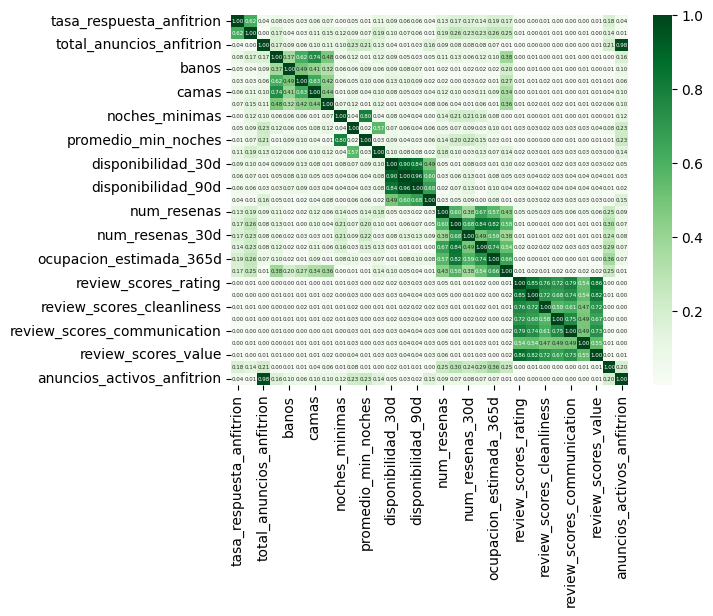

In [20]:
HeatMap= sns.heatmap(CorrFactors2, cmap = 'Greens', annot=True, fmt=".2f", annot_kws={'size': 4})
HeatMap

In [21]:
# Calculamos la matriz de correlaciones
corrmatrix = cuantitativas.corr()
corrabs = corrmatrix.abs()

upper = corrabs.where(np.triu(np.ones(corrabs.shape), k=1).astype(bool))

# Filtrar correlaciones mayores a 0.5
CorrFuertes = (
    upper.stack()  # convierte a formato largo
         .reset_index()
)
CorrFuertes.columns = ["Variable_1", "Variable_2", "Correlacion"]

CorrFuertes = CorrFuertes[CorrFuertes["Correlacion"] > 0.4]

# Ordenamos de mayor a menor
CorrFuertes = CorrFuertes.sort_values(by="Correlacion", ascending=False)

display(CorrFuertes)

,Variable_1,Variable_2,Correlacion
86,total_anuncios_anfitrion,anuncios_activos_anfitrion,0.978492
312,disponibilidad_60d,disponibilidad_90d,0.963740
294,disponibilidad_30d,disponibilidad_60d,0.902467
434,review_scores_rating,review_scores_value,0.859542
429,review_scores_rating,review_scores_accuracy,0.850217
295,disponibilidad_30d,disponibilidad_90d,0.843231
375,num_resenas_12m,num_resenas_1y,0.841374
376,num_resenas_12m,ocupacion_estimada_365d,0.823568
441,review_scores_accuracy,review_scores_value,0.820291
213,noches_minimas,promedio_min_noches,0.797618


REGRESIÓN LINEAL MÚLTIPLE (Punto 6)

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [23]:
#review_scores_rating
# Selección de variable dependiente e independiente
Dep1 = cuantitativas['review_scores_rating']
# Selección de variables independientes con mayor correlación
Indep1 = cuantitativas[['review_scores_value', 'review_scores_accuracy', 'review_scores_cleanliness']]

# modelo de regresión lineal múltiple
modelo1 = LinearRegression()
modelo1.fit(X=Indep1, y=Dep1)

# coedficientes y R-cuadrada
Modelo_1 = modelo1.__dict__
coef1 = modelo1.score(Indep1, Dep1)

print("modelo de regresión lineal múltiple prediciendo review_scores_rating:")
print(Modelo_1)
print(f"R-cuadrada: {coef1:.4f}")

# ecuación de regresión lineal múltiple
print("\nMultiple Linear Regression Equation:")
equation = f"review_scores_rating = {Modelo_1['intercept_']:.4f}"
for i, col in enumerate(Indep1.columns):
    equation += f" + {Modelo_1['coef_'][i]:.4f} * {col}"
print(equation)


modelo de regresión lineal múltiple prediciendo review_scores_rating:
{'fit_intercept': True, 'copy_X': True, 'tol': 1e-06, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_value', 'review_scores_accuracy',
       'review_scores_cleanliness'], dtype=object), 'n_features_in_': 3, 'coef_': array([0.38942878, 0.39149763, 0.21020299]), 'rank_': 3, 'singular_': array([91.5193159 , 31.90395646, 24.57006659]), 'intercept_': np.float64(0.05238262379381187)}
R-cuadrada: 0.8206

Multiple Linear Regression Equation:
review_scores_rating = 0.0524 + 0.3894 * review_scores_value + 0.3915 * review_scores_accuracy + 0.2102 * review_scores_cleanliness


In [24]:
#tasa_aceptacion_anfitrion
# Selección de variable dependiente e independiente
Dep2 = cuantitativas['tasa_aceptacion_anfitrion']
# Selección de variables independientes con mayor correlación
Indep2 = cuantitativas[['tasa_respuesta_anfitrion']]

# modelo de regresión lineal múltiple
modelo2 = LinearRegression()
modelo2.fit(X=Indep2, y=Dep2)

# coedficientes y R-cuadrada
Modelo_2 = modelo2.__dict__
coef2 = modelo2.score(Indep2, Dep2)

print("modelo de regresión lineal múltiple prediciendo tasa_aceptacion_anfitrion:")
print(Modelo_2)
print(f"R-cuadrada: {coef2:.4f}")

# ecuación de regresión lineal múltiple
print("\nMultiple Linear Regression Equation:")
equation = f"tasa_aceptacion_anfitrion = {Modelo_2['intercept_']:.4f}"
for i, col in enumerate(Indep2.columns):
    equation += f" + {Modelo_2['coef_'][i]:.4f} * {col}"
print(equation)

modelo de regresión lineal múltiple prediciendo tasa_aceptacion_anfitrion:
{'fit_intercept': True, 'copy_X': True, 'tol': 1e-06, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['tasa_respuesta_anfitrion'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.83053057]), 'rank_': 1, 'singular_': array([2368.86521061]), 'intercept_': np.float64(9.6859755969991)}
R-cuadrada: 0.3803

Multiple Linear Regression Equation:
tasa_aceptacion_anfitrion = 9.6860 + 0.8305 * tasa_respuesta_anfitrion


In [25]:
#es_superanfitrion
# Selección de variables
Dep3 = cuantitativas['es_superanfitrion']
Indep3 = cuantitativas[['tasa_respuesta_anfitrion',
                        'tasa_aceptacion_anfitrion',
                        'review_scores_rating',
                        'ingresos_estimados_365d']]

# Eliminamos filas con NaN en cualquiera de las columnas seleccionadas
data_model3 = pd.concat([Dep3, Indep3], axis=1).dropna()

# Redefinimos variables limpias
Dep3 = data_model3['es_superanfitrion']
Indep3 = data_model3[['tasa_respuesta_anfitrion',
                      'tasa_aceptacion_anfitrion',
                      'review_scores_rating',
                      'ingresos_estimados_365d']]

# Modelo de regresión lineal múltiple
modelo3 = LinearRegression()
modelo3.fit(X=Indep3, y=Dep3)

# Resultados
r2 = modelo3.score(Indep3, Dep3)

print("Modelo de regresión lineal múltiple prediciendo 'es_superanfitrion':")
print(f"R-cuadrada: {r2:.4f}\n")

# Ecuación del modelo
print("Ecuación de la regresión lineal múltiple:")
equation = f"es_superanfitrion = {modelo3.intercept_:.4f}"
for i, col in enumerate(Indep3.columns):
    equation += f" + ({modelo3.coef_[i]:.4f} * {col})"
print(equation)


Modelo de regresión lineal múltiple prediciendo 'es_superanfitrion':
R-cuadrada: 0.0809

Ecuación de la regresión lineal múltiple:
es_superanfitrion = -0.1619 + (0.0039 * tasa_respuesta_anfitrion) + (-0.0002 * tasa_aceptacion_anfitrion) + (0.0004 * review_scores_rating) + (0.0000 * ingresos_estimados_365d)


In [26]:
#total_anuncios_anfitrion
# Selección de variable dependiente e independiente
Dep4 = cuantitativas['total_anuncios_anfitrion']
# Selección de variables independientes con mayor correlación
Indep4 = cuantitativas[['disponibilidad_365d', 'num_resenas', 'ingresos_estimados_365d']]

# modelo de regresión lineal múltiple
modelo4 = LinearRegression()
modelo4.fit(X=Indep4, y=Dep4)

# coedficientes y R-cuadrada
Modelo_4 = modelo4.__dict__
coef4 = modelo4.score(Indep4, Dep4)

print("modelo de regresión lineal múltiple prediciendo total_anuncios_anfitrion:")
print(Modelo_4)
print(f"R-cuadrada: {coef4:.4f}")

# ecuación de regresión lineal múltiple
print("\nMultiple Linear Regression Equation:")
equation = f"total_anuncios_anfitrion = {Modelo_4['intercept_']:.4f}"
for i, col in enumerate(Indep4.columns):
    equation += f" + {Modelo_4['coef_'][i]:.4f} * {col}"
print(equation) 

modelo de regresión lineal múltiple prediciendo total_anuncios_anfitrion:
{'fit_intercept': True, 'copy_X': True, 'tol': 1e-06, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['disponibilidad_365d', 'num_resenas', 'ingresos_estimados_365d'],
      dtype=object), 'n_features_in_': 3, 'coef_': array([ 0.08855268, -0.11086682,  0.00020123]), 'rank_': 3, 'singular_': array([1861723.51396809,   18934.28854773,    8936.48349392]), 'intercept_': np.float64(24.97125524619058)}
R-cuadrada: 0.0325

Multiple Linear Regression Equation:
total_anuncios_anfitrion = 24.9713 + 0.0886 * disponibilidad_365d + -0.1109 * num_resenas + 0.0002 * ingresos_estimados_365d


In [27]:
#capacidad
# Selección de variable dependiente e independiente
Dep5 = cuantitativas['capacidad']
# Selección de variables independientes con mayor correlación
Indep5 = cuantitativas[['camas', 'habitaciones']]

# modelo de regresión lineal múltiple
modelo5 = LinearRegression()
modelo5.fit(X=Indep5, y=Dep5)

# coedficientes y R-cuadrada
Modelo_5 = modelo5.__dict__
coef5 = modelo5.score(Indep5, Dep5)

print("modelo de regresión lineal múltiple prediciendo capacidad:")
print(Modelo_5)
print(f"R-cuadrada: {coef5:.4f}")

# ecuación de regresión lineal múltiple
print("\nMultiple Linear Regression Equation:")
equation = f"capacidad = {Modelo_5['intercept_']:.4f}"
for i, col in enumerate(Indep5.columns):
    equation += f" + {Modelo_5['coef_'][i]:.4f} * {col}"
print(equation) 

modelo de regresión lineal múltiple prediciendo capacidad:
{'fit_intercept': True, 'copy_X': True, 'tol': 1e-06, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['camas', 'habitaciones'], dtype=object), 'n_features_in_': 2, 'coef_': array([0.88236728, 0.53446137]), 'rank_': 2, 'singular_': array([175.6948928 ,  75.87227924]), 'intercept_': np.float64(0.7715804857177555)}
R-cuadrada: 0.5899

Multiple Linear Regression Equation:
capacidad = 0.7716 + 0.8824 * camas + 0.5345 * habitaciones


In [28]:
#habitaciones
# Selección de variable dependiente e independiente
Dep6 = cuantitativas['habitaciones']
# Selección de variables independientes con mayor correlación
Indep6 = cuantitativas[['camas', 'banos', 'capacidad']]

# modelo de regresión lineal múltiple
modelo6 = LinearRegression()
modelo6.fit(X=Indep6, y=Dep6)

# coedficientes y R-cuadrada
Modelo_6 = modelo6.__dict__
coef6 = modelo6.score(Indep6, Dep6)

print("modelo de regresión lineal múltiple prediciendo habitaciones:")
print(Modelo_6)
print(f"R-cuadrada: {coef6:.4f}")

# ecuación de regresión lineal múltiple
print("\nMultiple Linear Regression Equation:")
equation = f"habitaciones = {Modelo_6['intercept_']:.4f}"
for i, col in enumerate(Indep6.columns):
    equation += f" + {Modelo_6['coef_'][i]:.4f} * {col}"
print(equation) 

modelo de regresión lineal múltiple prediciendo habitaciones:
{'fit_intercept': True, 'copy_X': True, 'tol': 1e-06, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['camas', 'banos', 'capacidad'], dtype=object), 'n_features_in_': 3, 'coef_': array([0.21291573, 0.40619588, 0.13643082]), 'rank_': 3, 'singular_': array([269.45727365,  93.15436266,  60.40818651]), 'intercept_': np.float64(0.019661103105591993)}
R-cuadrada: 0.4974

Multiple Linear Regression Equation:
habitaciones = 0.0197 + 0.2129 * camas + 0.4062 * banos + 0.1364 * capacidad


In [29]:
#precio
# Selección de variable dependiente e independiente
Dep7 = cuantitativas['precio']
# Selección de variables independientes con mayor correlación
Indep7 = cuantitativas[['camas', 'habitaciones', 'capacidad']]

# modelo de regresión lineal múltiple
modelo7 = LinearRegression()
modelo7.fit(X=Indep7, y=Dep7)

# coedficientes y R-cuadrada
Modelo_7 = modelo7.__dict__
coef7 = modelo7.score(Indep7, Dep7)

print("modelo de regresión lineal múltiple prediciendo precio:")
print(Modelo_7)
print(f"R-cuadrada: {coef7:.4f}")

# ecuación de regresión lineal múltiple
print("\nMultiple Linear Regression Equation:")
equation = f"precio = {Modelo_7['intercept_']:.4f}"
for i, col in enumerate(Indep7.columns):
    equation += f" + {Modelo_7['coef_'][i]:.4f} * {col}"
print(equation) 

modelo de regresión lineal múltiple prediciendo precio:
{'fit_intercept': True, 'copy_X': True, 'tol': 1e-06, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['camas', 'habitaciones', 'capacidad'], dtype=object), 'n_features_in_': 3, 'coef_': array([11.45330363, 20.99870176, 15.55004653]), 'rank_': 3, 'singular_': array([278.24958979,  95.42235109,  75.85344295]), 'intercept_': np.float64(21.076829053940912)}
R-cuadrada: 0.2612

Multiple Linear Regression Equation:
precio = 21.0768 + 11.4533 * camas + 20.9987 * habitaciones + 15.5500 * capacidad


In [30]:
#review_scores_value
# Selección de variable dependiente e independiente
Dep8 = cuantitativas['review_scores_value']
# Selección de variables independientes con mayor correlación
Indep8 = cuantitativas[['review_scores_accuracy', 'review_scores_cleanliness']]

# modelo de regresión lineal múltiple
modelo8 = LinearRegression()
modelo8.fit(X=Indep8, y=Dep8)

# coedficientes y R-cuadrada
Modelo_8 = modelo8.__dict__
coef8 = modelo8.score(Indep8, Dep8)

print("modelo de regresión lineal múltiple prediciendo review_scores_value:")
print(Modelo_8)
print(f"R-cuadrada: {coef8:.4f}")

# ecuación de regresión lineal múltiple
print("\nMultiple Linear Regression Equation:")
equation = f"review_scores_value = {Modelo_8['intercept_']:.4f}"
for i, col in enumerate(Indep8.columns):
    equation += f" + {Modelo_8['coef_'][i]:.4f} * {col}"
print(equation) 

modelo de regresión lineal múltiple prediciendo review_scores_value:
{'fit_intercept': True, 'copy_X': True, 'tol': 1e-06, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_accuracy', 'review_scores_cleanliness'],
      dtype=object), 'n_features_in_': 2, 'coef_': array([0.71654056, 0.30100223]), 'rank_': 2, 'singular_': array([72.36146004, 29.39133882]), 'intercept_': np.float64(-0.22618252643122183)}
R-cuadrada: 0.7080

Multiple Linear Regression Equation:
review_scores_value = -0.2262 + 0.7165 * review_scores_accuracy + 0.3010 * review_scores_cleanliness


In [31]:
#banos
# Selección de variable dependiente e independiente
Dep9 = cuantitativas['banos']
# Selección de variables independientes con mayor correlación
Indep9 = cuantitativas[['habitaciones', 'camas']]

# modelo de regresión lineal múltiple
modelo9 = LinearRegression()
modelo9.fit(X=Indep9, y=Dep9)

# coedficientes y R-cuadrada
Modelo_9 = modelo9.__dict__
coef9 = modelo9.score(Indep9, Dep9)

print("modelo de regresión lineal múltiple prediciendo banos:")
print(Modelo_9)
print(f"R-cuadrada: {coef9:.4f}")

# ecuación de regresión lineal múltiple
print("\nMultiple Linear Regression Equation:")
equation = f"banos = {Modelo_9['intercept_']:.4f}"
for i, col in enumerate(Indep9.columns):
    equation += f" + {Modelo_9['coef_'][i]:.4f} * {col}"
print(equation) 

modelo de regresión lineal múltiple prediciendo banos:
{'fit_intercept': True, 'copy_X': True, 'tol': 1e-06, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['habitaciones', 'camas'], dtype=object), 'n_features_in_': 2, 'coef_': array([0.23478953, 0.07230454]), 'rank_': 2, 'singular_': array([175.6948928 ,  75.87227924]), 'intercept_': np.float64(0.784265824760956)}
R-cuadrada: 0.2536

Multiple Linear Regression Equation:
banos = 0.7843 + 0.2348 * habitaciones + 0.0723 * camas


In [32]:
#num_resenas_30d
# Selección de variable dependiente e independiente
Dep10 = cuantitativas['num_resenas_30d']
# Selección de variables independientes con mayor correlación
Indep10 = cuantitativas[['num_resenas_12m', 'ocupacion_estimada_365d', 'num_resenas_1y']]

# modelo de regresión lineal múltiple
modelo10 = LinearRegression()
modelo10.fit(X=Indep10, y=Dep10)

# coedficientes y R-cuadrada
Modelo_10 = modelo10.__dict__
coef10 = modelo10.score(Indep10, Dep10)

print("modelo de regresión lineal múltiple prediciendo num_resenas_30d:")
print(Modelo_10)
print(f"R-cuadrada: {coef10:.4f}")

# ecuación de regresión lineal múltiple
print("\nMultiple Linear Regression Equation:")
equation = f"num_resenas_30d = {Modelo_10['intercept_']:.4f}"
for i, col in enumerate(Indep10.columns):
    equation += f" + {Modelo_10['coef_'][i]:.4f} * {col}"
print(equation) 

modelo de regresión lineal múltiple prediciendo num_resenas_30d:
{'fit_intercept': True, 'copy_X': True, 'tol': 1e-06, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['num_resenas_12m', 'ocupacion_estimada_365d', 'num_resenas_1y'],
      dtype=object), 'n_features_in_': 3, 'coef_': array([ 0.07456438,  0.00296395, -0.02707563]), 'rank_': 3, 'singular_': array([14373.31689746,  2145.95463111,  1057.96058229]), 'intercept_': np.float64(0.2703117731095881)}
R-cuadrada: 0.4836

Multiple Linear Regression Equation:
num_resenas_30d = 0.2703 + 0.0746 * num_resenas_12m + 0.0030 * ocupacion_estimada_365d + -0.0271 * num_resenas_1y
